In [2]:
import joblib
import numpy as np
import pandas as pd
import sklearn
import imblearn
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
#from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings('ignore')

C:\Users\Caroline\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [4]:
df_ckd = pd.read_csv('df_ckd_clean.csv', low_memory=False)
df_ckd.columns

In [37]:
df_ckd["classification"].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [38]:
df_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood_Pressure           400 non-null    float64
 2   Specific_Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red_Blood_Cells          400 non-null    int64  
 6   Pus_Cell                 400 non-null    int64  
 7   Pus_Cell_Clumps          400 non-null    int64  
 8   Bacteria                 400 non-null    int64  
 9   Blood_Glucose_Random     400 non-null    float64
 10  Blood_Urea               400 non-null    float64
 11  Serum_Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Haemoglobin              4

In [6]:
X=df_ckd.drop('classification',axis=1)
y=df_ckd['classification']

<Axes: ylabel='classification'>

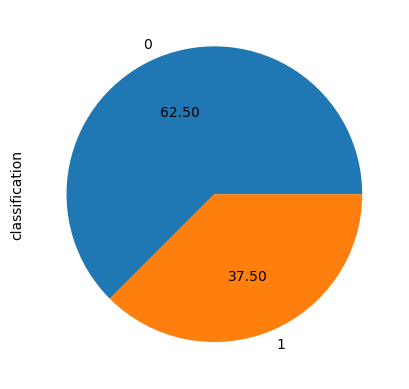

In [7]:
# Affichage actuel des classes (malades / sains)
y.value_counts().plot.pie(autopct='%.2f')

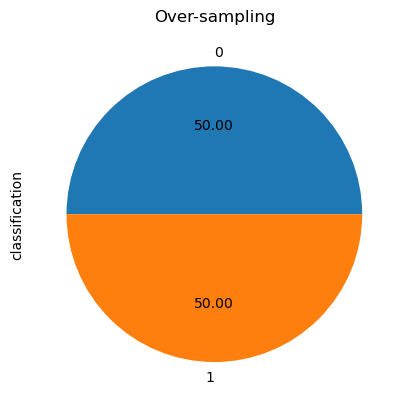

In [8]:
# Rééquilibrage et visualisation des classes après application du over-sampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [42]:
scaler_list1= [Normalizer(), StandardScaler(), MinMaxScaler()]
scaler_list2= [ MaxAbsScaler(), RobustScaler(),PowerTransformer()]
classifier_list= [ RandomForestClassifier(), LogisticRegression(), SVC(),
                  MLPClassifier(), XGBClassifier(), LGBMClassifier(),
                  CatBoostClassifier(), GaussianNB() ]

In [22]:
# définition d'une pipeline pour tester l'ensemble des scaler et l'ensemble des classifiers.
# la liste des scalers a été scindée en deux pour des raisons de performance.

results1= []
for scaler in scaler_list1:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results1.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

"results1= []\nfor scaler in scaler_list1:\n    for classifier in classifier_list:\n        pipe = Pipeline([\n        ('scaler', scaler),\n        ('classifier', classifier)\n        ])\n        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')\n        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)\n        Accuracy= accuracy_score(y_res, y_pred),\n        Precision= precision_score(y_res, y_pred),\n        Recall= recall_score(y_res, y_pred),\n        F1_Score= f1_score(y_res, y_pred),\n        ROC_AUC= roc_auc_score(y_res, y_pred)\n        results1.append((classifier.__class__.__name__, scaler.__class__.__name__, \n                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))"

In [23]:
results2= []
for scaler in scaler_list2:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results2.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

"results2= []\nfor scaler in scaler_list2:\n    for classifier in classifier_list:\n        pipe = Pipeline([\n        ('scaler', scaler),\n        ('classifier', classifier)\n        ])\n        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')\n        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)\n        Accuracy= accuracy_score(y_res, y_pred),\n        Precision= precision_score(y_res, y_pred),\n        Recall= recall_score(y_res, y_pred),\n        F1_Score= f1_score(y_res, y_pred),\n        ROC_AUC= roc_auc_score(y_res, y_pred)\n        results2.append((classifier.__class__.__name__, scaler.__class__.__name__, \n                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))"

In [24]:
results1 = pd.DataFrame(results1, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])
results2 = pd.DataFrame(results2, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])

"results1 = pd.DataFrame(results1, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])\nresults2 = pd.DataFrame(results2, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])"

In [25]:
total_result_undersampled= pd.concat([results1, results2], ignore_index = True)
total_result_undersampled.sort_values(by= ['Recall'], ascending= False)

"total_result_undersampled= pd.concat([results1, results2], ignore_index = True)\ntotal_result_undersampled.sort_values(by= ['Recall'], ascending= False)"

In [26]:
# Recherche des hyperparamètres pour le classifier avec GridSearch Cross Validation

# Choix du scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Créer le modèle RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Créer l'objet GridSearchCV avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter GridSearchCV aux données
grid_search.fit(X_scaled, y_res)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Obtenir le meilleur score
print("Meilleur score:", grid_search.best_score_)'''

'# Choix du scaler\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X_res)\n\n# Définir les hyperparamètres à tester\nparam_grid = {\n    \'n_estimators\': [50, 100, 150],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# Créer le modèle RandomForestClassifier\nrf = RandomForestClassifier(random_state=42)\n\n# Créer l\'objet GridSearchCV avec validation croisée\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=\'accuracy\')\n\n# Adapter GridSearchCV aux données\ngrid_search.fit(X_scaled, y_res)\n\n# Afficher les meilleurs paramètres\nprint("Meilleurs paramètres:", grid_search.best_params_)\n\n# Obtenir le meilleur score\nprint("Meilleur score:", grid_search.best_score_)'

In [9]:
# Création du modèle avec les hyperparamètres sus définis
# Définition des x et du y
X=df_ckd[['Age', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Haemoglobin',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia']]
y=df_ckd['classification']

# Rééquilibrage et visualisation des classes après application du over-sampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

# Normaliser les données
scaler_CKD = StandardScaler()
X_scaled = scaler_CKD.fit_transform(X_res)

# sauvegarde du scaler
joblib.dump(scaler_CKD, 'StandardScaler_CKD.joblib')

# Créer le modèle RandomForestClassifier avec les meilleurs paramètres
best_rf = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_res, random_state=0, train_size = 0.75)

# Entraîner le modèle sur l'intégralité des données
best_rf.fit(X_train, y_train)

# Comparer les scores Test/Train

print("\nScore for the Train dataset :", best_rf.score(X_train, y_train))
print("Score for the Test dataset :", best_rf.score(X_test, y_test))


Score for the Train dataset : 1.0
Score for the Test dataset : 1.0


In [11]:
# matrice de confusion

from sklearn.metrics import confusion_matrix

# Convertir les classes en chaînes de caractères
classes_str = [str(c) for c in best_rf.classes_]

# Créer la matrice de confusion avec des noms de classes
confusion_df = pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=best_rf.predict(X_test)),
                             index=[f"{c} ACTUAL" for c in classes_str],
                             columns=[f"{c} PREDICTED" for c in classes_str])

print(confusion_df)


          0 PREDICTED  1 PREDICTED
0 ACTUAL           62            0
1 ACTUAL            0           63


In [12]:
# sauvegarde du modèle

joblib.dump(best_rf, 'RandomForest_CKD.joblib')

['RandomForest_CKD.joblib']